# How to Process, Analyze and Visualize Data (I)
This is a course provided by MIT Open Course Ware.
This notebook solves Exercise 1, using Python 3, which simply consists of downloading the US Election data from 2008 (the link is found on the course website), and plot the donations for Obama and McCain, as a function of time. The code is quite similar to the one that can be found on the course website, with little variations here and there.

Read the file (because of the comma added to be able to read the .csv file in R, it creates an empty field at the end).

In [4]:
import csv
reader = csv.DictReader(open('donations.csv', 'r'))
print(reader.fieldnames)

['cmte_id', 'cand_id', 'cand_nm', 'contbr_nm', 'contbr_city', 'contbr_st', 'contbr_zip', 'contbr_employer', 'contbr_occupation', 'contb_receipt_amt', 'contb_receipt_dt', 'receipt_desc', 'memo_cd', 'memo_text', 'form_tp', 'file_num', 'tran_id', 'election_tp', '']


We extract the data we care about to be able to investigate the contributions per candidate, and per date. 
For this, we thus need the name of the candidate, the date of the donation, and the amount. We show how to retrieve the data.

In [5]:
for index, row in enumerate(reader):
    name = row['cand_nm']
    datestr = row['contb_receipt_dt']
    amount = row['contb_receipt_amt']
    if index < 10:
        print(','.join([name, datestr, amount]))

Cox, John H,01-MAR-07,25
Cox, John H,25-JAN-07,25
Cox, John H,17-MAY-07,50
Cox, John H,18-JAN-07,10
Cox, John H,18-JAN-07,25
Cox, John H,11-JAN-07,25
Cox, John H,12-JAN-07,20
Cox, John H,11-JAN-07,5
Cox, John H,11-JAN-07,10
Cox, John H,10-JAN-07,10


For experiments, it is best to use sampled data, so that computations are faster. We write in a file a sample of the original data file.

In [12]:
fw = open('donations_samples.csv','w') 
with open('donations.csv', 'r') as fr: 
    i = 0
    for line in fr:
        if i % 1000 == 0:
            fw.write(line)
        i +=1
fw.close()

In [90]:
import csv
reader_sampled = csv.DictReader(open('donations_samples.csv', 'r'))
print(reader_sampled.fieldnames)

['cmte_id', 'cand_id', 'cand_nm', 'contbr_nm', 'contbr_city', 'contbr_st', 'contbr_zip', 'contbr_employer', 'contbr_occupation', 'contb_receipt_amt', 'contb_receipt_dt', 'receipt_desc', 'memo_cd', 'memo_text', 'form_tp', 'file_num', 'tran_id', 'election_tp', '']


In [98]:
from collections import defaultdict
import matplotlib.pyplot as plt
import datetime

def donationsDate(rdr,cand_nm):
    #rdr is the csv file read (reader or reader_sampled), cand_nm is the name of the candidate we care about
    #empty dictionary to store the donations for the chosen candidate, defaultdict has the feature that when we try to
    #access an item whose key is not found, the item is added rather than giving a keyerror, the defaut item is of the 
    #type given in (), e.g. defaultdict(int) will use int() and return the item 0
    canddonations = defaultdict(int)
    for row in rdr:
        name = row['cand_nm']
        datestr = row['contb_receipt_dt']
        amount = float(row['contb_receipt_amt'])
        #interprets the time data as a date
        date = datetime.datetime.strptime(datestr, '%d-%b-%y')
        if cand_nm in name:
            canddonations[date] += amount
    # we need to sort dates chronologically 
    sorted_by_date = sorted(canddonations.items())
    #a typical entry of sorted_by_date is (datetime.datetime(2007, 1, 16, 0, 0), 100.0),* unpacks and zip gathers dates
    #together on the one hand, and sums together on the other hand
    xs,ys = list(zip(*sorted_by_date))
    plt.plot(xs, ys, label='Donations')
    plt.legend(loc='upper center', ncol = 4)

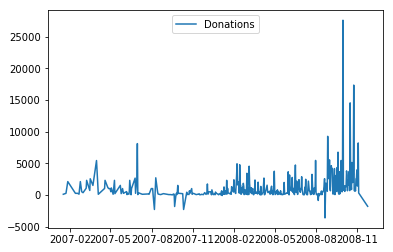

In [99]:
reader_sampled = csv.DictReader(open('donations_samples.csv', 'r'))
donationsDate(reader_sampled,'Obama')
plt.show()
#plt.savefig('/tmp/test.png', format='png')

It seems to be working fine, let us try with the whole data.

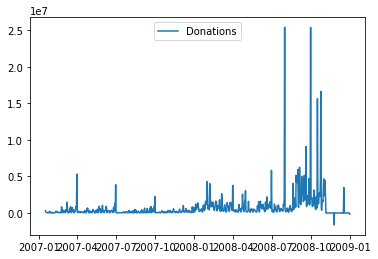

In [100]:
import csv
reader = csv.DictReader(open('donations.csv', 'r'))
donationsDate(reader,'Obama')
plt.show()

Let us try with Mc Cain.

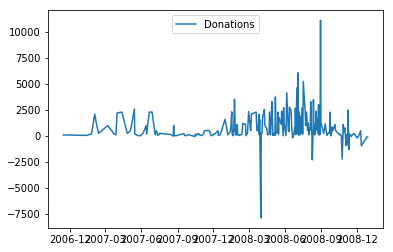

In [101]:
reader_sampled = csv.DictReader(open('donations_samples.csv', 'r'))
donationsDate(reader_sampled,'McCain')
plt.show()

We now try with Mc Cain and the whole data.

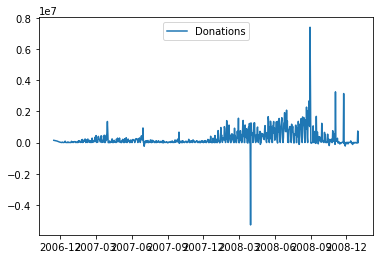

In [102]:
reader = csv.DictReader(open('donations.csv', 'r'))
donationsDate(reader,'McCain')
plt.show()

We compare Donations for Obama (in orange) and Mc Cain (in blue). Putting the plot function inside the function donationDate was probably not the best way for multiple plots, but still it can be done. Also there should be a better way to write things so that we do not need to load the data twice. This corresponds to Exercise 1, plot Obama vs McCain. We observe strange peaks below zero, strange since we are summing donations.

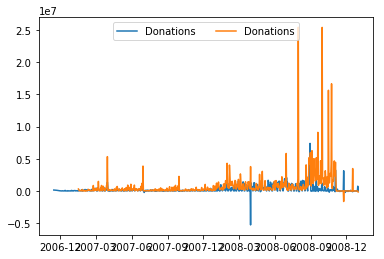

In [106]:
reader = csv.DictReader(open('donations.csv', 'r'))
donationsDate(reader,'McCain')
reader = csv.DictReader(open('donations.csv', 'r'))
donationsDate(reader,'Obama')
plt.show()